# Prediction of Purchase Patterns

We have been tasked to predict whether a certain customer entering a store
will end up making a purchase or not. The data has anonymized features of categorical and numeric nature. Let's find out if we can make sense of this!

In [1]:
# Import some basic python libraries

import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn import preprocessing
import collections
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix
import matplotlib.pyplot as plt

In [2]:
import os
os.getcwd()

'/Users/JohanLg/Downloads'

In [3]:
os.chdir('---')

In [4]:
data = pd.read_csv('train (2).csv')

In [5]:
print(data.shape)

(31428, 27)


In [6]:
# Let's have a quick glance at the data

data.head(6)

# We know that label is our dependant variable, where -1 indicates no purchase
# and 1 the opposite. 


,label,id,visitTime,purchaseTime,hour,C1,C2,C3,C4,C5,...,N4,N5,N6,N7,N8,N9,N10,C10,C11,C12
0,-1,37,19274330,-1,0,2569487005,1830830742,4228834423,652481754,2967512603,...,0,0,0,0,0,0,0,419316267,3617851689,4220791646
1,-1,55,19274334,-1,0,3191875643,403381353,1238330876,652481754,2967512603,...,0,0,0,0,1,0,0,1968545380,3831440054,1213938795
2,-1,114,19274353,-1,0,2634604934,403381353,1928325921,652481754,2967512603,...,0,0,0,0,0,0,0,1405802835,2379633508,1284343215
3,-1,128,19274358,-1,0,2569487005,403381353,296915027,652481754,2967512603,...,0,0,0,0,0,0,0,2299319102,3617851689,4220791646
4,-1,164,19274367,-1,0,2569487005,403381353,681762206,652481754,2967512603,...,0,0,0,0,0,0,0,1306075469,3617851689,4220791646
5,-1,187,19274374,-1,0,3302106226,403381353,1928325921,652481754,2967512603,...,0,0,0,0,0,0,0,3182036626,2379633508,1284343215


From here, there are multiple aspects i'd like to dig deeper into. These steps can be broken down into

    - 1.Data Preprocessing:
    
        1. Are there missing values in the data? Might this affect            my results?
        2. How is the distribution of my numeric variables? Do they            have outliers? 
        3. Is the 'label'-class, our dependant variable, balanced?            If not, which
           sampling-technique should I use?
           
    - 2.Feature Selection:
    
        1. Which variables seem to drive 'label'? Can I think of              any varibles
           that are missing to avoid omitted-variable bias?
        2. How are the variables correlated? Can I drop some                  varibles to avoid
           multi-collinearity?


# Data Preprocessing

## 1.1 Missing Values

In [7]:
null = data.isnull()
null.sum()/len(data)

#No missing Values. Great!

label           0.0
id              0.0
visitTime       0.0
purchaseTime    0.0
hour            0.0
C1              0.0
C2              0.0
C3              0.0
C4              0.0
C5              0.0
C6              0.0
C7              0.0
C8              0.0
N1              0.0
C9              0.0
N2              0.0
N3              0.0
N4              0.0
N5              0.0
N6              0.0
N7              0.0
N8              0.0
N9              0.0
N10             0.0
C10             0.0
C11             0.0
C12             0.0
dtype: float64

## 1.2 Distributions

In [8]:
# Lets run a for-loop to plot out our categorical and numeric variables

Categorical_Var = data.iloc[:,data.columns.str.startswith('C')] 

for i in range(1,len(Categorical_Var.columns)):
    Cat_Counts = Categorical_Var.iloc[:,i].value_counts()
    print ("    Var %s     " % i)
    print(Cat_Counts)

    Var 1     
403381353     11098
1235983246     6173
2018710401     5397
2541203883     3860
1830830742     3625
1258965892      635
2517724481      635
2201746798        5
Name: C2, dtype: int64
    Var 2     
1928325921    1232
3475347077    1212
2780744710    1179
1711803242     936
1822656032     536
              ... 
3540895230       1
2756181513       1
3550862535       1
1199484467       1
1533319149       1
Name: C3, Length: 2863, dtype: int64
    Var 3     
652481754     20951
2308170622     6081
306394936      2844
2210625817     1552
Name: C4, dtype: int64
    Var 4     
2967512603    23045
2116767313     8364
3955179140       19
Name: C5, dtype: int64
    Var 5     
571765677     5194
2712499304    3835
4003458018    1886
85977907      1715
152923169     1092
              ... 
3390967276      13
3912268313      12
2116604436       9
2762466016       9
4088755483       7
Name: C6, Length: 84, dtype: int64
    Var 6     
2303407174    24113
1342367140     4123
2411180110 

In [9]:
Numerical_Var = data.loc[:,data.columns.str.startswith('N')]


for i in range(0, Numerical_Var.shape[1]):
    Num_Counts = Numerical_Var.iloc[:,i].value_counts()
    print(" Var %s  " %i)
    print(Num_Counts)
    
# We can see that most variables are heavily imbalanced. 
# Our solution for this will be normalising using the StandardScaler()

 Var 0  
0    24705
1     2688
4     2055
2     1094
3      735
5      151
Name: N1, dtype: int64
 Var 1  
0     28370
1      1019
2       426
10      272
5       240
9       223
3       200
4       163
6       162
8       119
7       118
11       59
12       27
13       13
14       10
15        7
Name: N2, dtype: int64
 Var 2  
0     30032
1       637
2       230
3       136
4        71
20       59
5        58
6        39
8        31
7        22
9        19
10       16
11       14
16       11
14       10
13       10
12        9
15        9
18        8
17        4
19        3
Name: N3, dtype: int64
 Var 3  
0     30633
1       259
2       137
3        85
20       68
4        48
6        31
5        30
10       18
7        17
8        17
13       16
9        15
11       13
12       10
14        9
17        7
19        6
15        5
18        3
16        1
Name: N4, dtype: int64
 Var 4  
0     31399
1        23
2         2
15        1
10        1
20        1
3         1
Name: N5, dtype: 

## 1.3 Balance of dependant variable

In [10]:
# Lets first show the independant variable

data.label.value_counts()

# Heavily imbalanced. Yikes
# Now time for solutions!


-1    31371
 1       57
Name: label, dtype: int64

In [11]:
# Start by defining dependant/independant variables. 
# Drop those that are unique or provide no value (purchasetime
# only being shown when a purchase happens)

X=data.drop(["label","purchaseTime",'id'], axis=1)
y=data['label']

In [12]:
# Normalizing numeric data

for i in Numerical_Var:
    x= X[[i]].values
    scaler = preprocessing.StandardScaler()
    x_scaled = scaler.fit_transform(x)
    X[i]=x_scaled
    

In [13]:
X.head()

,visitTime,hour,C1,C2,C3,C4,C5,C6,C7,C8,...,N4,N5,N6,N7,N8,N9,N10,C10,C11,C12
0,19274330,0,2569487005,1830830742,4228834423,652481754,2967512603,3624739744,2303407174,2206061889,...,-0.106697,-0.015298,-0.048464,-0.027133,-0.130523,-0.041971,-0.049696,419316267,3617851689,4220791646
1,19274334,0,3191875643,403381353,1238330876,652481754,2967512603,179712055,2303407174,157533148,...,-0.106697,-0.015298,-0.048464,-0.027133,0.183475,-0.041971,-0.049696,1968545380,3831440054,1213938795
2,19274353,0,2634604934,403381353,1928325921,652481754,2967512603,1607619193,2303407174,3588031319,...,-0.106697,-0.015298,-0.048464,-0.027133,-0.130523,-0.041971,-0.049696,1405802835,2379633508,1284343215
3,19274358,0,2569487005,403381353,296915027,652481754,2967512603,10212495,2303407174,3588031319,...,-0.106697,-0.015298,-0.048464,-0.027133,-0.130523,-0.041971,-0.049696,2299319102,3617851689,4220791646
4,19274367,0,2569487005,403381353,681762206,652481754,2967512603,580883881,2303407174,157533148,...,-0.106697,-0.015298,-0.048464,-0.027133,-0.130523,-0.041971,-0.049696,1306075469,3617851689,4220791646


# Feature selection

Now that we have some 'clean' data, let's find some insights

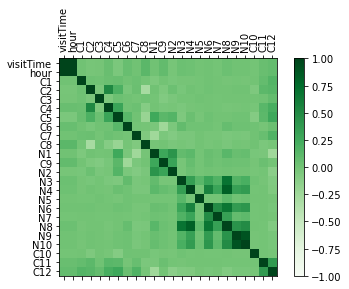

In [14]:
corr = X.corr()
fig = plt.figure()
ax = fig.add_subplot(111)
cax = ax.matshow(corr,cmap='Greens', vmin=-1, vmax=1)
fig.colorbar(cax)
ticks = np.arange(0,len(X.columns),1)
ax.set_xticks(ticks)
plt.xticks(rotation=90)
ax.set_yticks(ticks)
ax.set_xticklabels(X.columns)
ax.set_yticklabels(X.columns)
plt.show()

# Visittime and Hour correlate highly. They represent more/less
# the same thing. Also, N9 and N10 will correlate. One of each will
# therefore be dropped

In [15]:
X1=X.drop(['hour','N9'], axis=1)

In [16]:
X1.visitTime.value_counts()

19328699    6
19319226    6
19325796    5
19314062    5
19310993    5
           ..
19310525    1
19283902    1
19314623    1
19318721    1
19300352    1
Name: visitTime, Length: 24587, dtype: int64

# Inbalanced classes. Running different variants of sampling methods


## NAIVE RESAMPLING , SMOTE


In [17]:
from imblearn.over_sampling import RandomOverSampler


Using TensorFlow backend.


In [90]:
import sys
!{sys.executable} -m pip install -U imbalanced-learn --ignore-installed scikit-learn 

  Using cached imbalanced_learn-0.6.2-py3-none-any.whl (163 kB)
  Using cached scikit_learn-0.22.2.post1-cp36-cp36m-macosx_10_9_x86_64.whl (7.2 MB)
^C
ERROR: Operation cancelled by user


In [18]:
from imblearn.over_sampling import SMOTE, ADASYN

### Oversample and then re-shuffle naively

In [19]:
ros = RandomOverSampler(random_state=1, sampling_strategy=0.4)

# We oversample the minority class

In [20]:
X_resampled, y_resampled = ros.fit_resample(X1, y)

In [21]:
y_resampled.value_counts()

# Class rebalanced to equal occurances 

-1    31371
 1    12548
Name: label, dtype: int64

### SMOTE

In [34]:
X_resampledSMOTE, y_resampledSMOTE = SMOTE(random_state=1, sampling_strategy=0.4).fit_resample(X1, y)

In [35]:
len(y_resampledSMOTE)

43919

In [38]:
len(X_resampledSMOTE)

43919

### Train Test splitting with NaiveS

In [24]:
from sklearn.model_selection import cross_validate 

In [27]:
from sklearn.ensemble import RandomForestClassifier

In [97]:
X_train, X_test, y_train, y_test = train_test_split(
 X_resampled, y_resampled, test_size=0.33, random_state=42)

### Train Test splitting with SMOTE

In [99]:
X_trainS, X_testS, y_trainS, y_testS = train_test_split(
 X_resampledSMOTE, y_resampledSMOTE, test_size=0.33, random_state=42)

In [83]:
from sklearn.metrics import classification_report
from sklearn.linear_model import LogisticRegression

### Random Forest

In [208]:
rf = RandomForestClassifier(n_estimators = 100).fit(X_resampled, y_resampled )

In [209]:
rf.feature_importances_

array([0.03135878, 0.0169661 , 0.00648048, 0.02896682, 0.00423088,
       0.00289801, 0.02665485, 0.01487345, 0.02714382, 0.02908546,
       0.04003049, 0.00482567, 0.10843139, 0.0516209 , 0.00138063,
       0.14238742, 0.00354649, 0.16788357, 0.23583409, 0.03371389,
       0.00786712, 0.01381969])

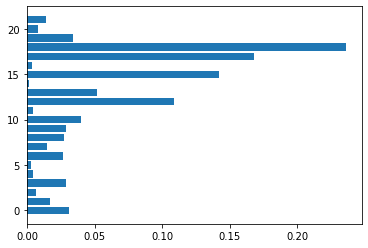

In [210]:
plt.barh(range(22), rf.feature_importances_)
plt.show(range(22))

In [211]:
imp_var = rf.feature_importances_ > 0.04
# Extract variables with gini > 0.1

In [212]:
imp1 = imp_var.tolist()

In [213]:
res = [i for i, val in enumerate(imp1) if val] 

In [214]:
X_resampledSMOTE.iloc[:,res].head(6)

# NEW variables to be used to train model

,C9,N3,N4,N6,N8,N10
0,4287642944,-0.132073,-0.106697,-0.048464,-0.130523,-0.049696
1,3272771221,0.645518,-0.106697,-0.048464,0.183475,-0.049696
2,3329757940,-0.132073,-0.106697,-0.048464,-0.130523,-0.049696
3,3427046189,-0.132073,-0.106697,-0.048464,-0.130523,-0.049696
4,2088887026,-0.132073,-0.106697,-0.048464,-0.130523,-0.049696
5,3329757940,-0.132073,-0.106697,-0.048464,-0.130523,-0.049696


### Random Forest on SMOTE 

In [215]:
rf = RandomForestClassifier(n_estimators = 100).fit(X_resampledSMOTE, y_resampledSMOTE)

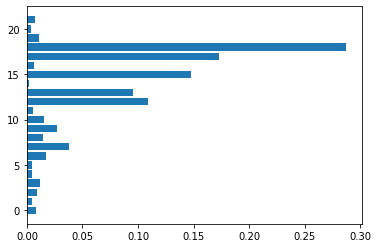

In [216]:
plt.barh(range(22), rf.feature_importances_)
plt.show(range(22))

# Cross Validation

In [28]:
res = cross_validate(RandomForestClassifier(), X_resampledSMOTE, y_resampledSMOTE , return_train_score = True, cv = 5, scoring=["f1"] )

In [29]:
res_df=pd.DataFrame(res)
res_df

,fit_time,score_time,test_f1,train_f1
0,4.600372,0.088432,0.997203,1.0
1,4.735136,0.091330,0.999005,1.0
2,4.449862,0.088960,0.998408,1.0
3,4.301876,0.087403,0.998606,1.0
4,4.468290,0.094638,0.981804,1.0


# Feature selection part 2

With random forest we have been able to find which variables have
the strongest influence on our data. These will be the final features we use 
in our prediction model

In [217]:
imp_var = rf.feature_importances_ > 0.05
# Extract variables with gini > 0.1
imp1 = imp_var.tolist()
res = [i for i, val in enumerate(imp1) if val] 
XNew = X_resampledSMOTE.iloc[:,res]
XNew.head()
# We see that the oversampling technique doesnt change much in feature selection 
# therefore, the prediction will be made solely on the SMOTE enhanced dataset

,N3,N4,N6,N8,N10
0,-0.132073,-0.106697,-0.048464,-0.130523,-0.049696
1,0.645518,-0.106697,-0.048464,0.183475,-0.049696
2,-0.132073,-0.106697,-0.048464,-0.130523,-0.049696
3,-0.132073,-0.106697,-0.048464,-0.130523,-0.049696
4,-0.132073,-0.106697,-0.048464,-0.130523,-0.049696


In [219]:
rf = RandomForestClassifier(n_estimators = 100).fit(XNew,y_resampledSMOTE )

In [224]:
X_train1, X_test1, y_train1, y_test1 = train_test_split(
 XNew, y_resampledSMOTE, test_size=0.33, random_state=42)

In [239]:
predictionsRF = rf.predict(X_test1)

# Feature Selection part 3 & Paremeter Optimization : Using GridSearchCV 

In [61]:
from sklearn.model_selection import GridSearchCV
from sklearn.feature_selection import RFECV
from sklearn.pipeline import Pipeline as pipe

In [41]:
X_train, X_test, y_train, y_test = train_test_split(X_resampledSMOTE, y_resampledSMOTE, random_state=42,stratify = y_resampledSMOTE)

In [43]:
rfc = RandomForestClassifier(n_jobs=-1,max_features= 'sqrt' ,n_estimators=50, oob_score = True) 

In [73]:
clf = RandomForestClassifier(random_state = 42, class_weight="balanced")

rfecv = RFECV(estimator=clf, step=1, cv=5, scoring='f1')

rfecv.fit(X_train,y_train)

print("Optimal number of features : %d" % rfecv.n_features_)
features=list(X_train.columns[rfecv.support_])

Optimal number of features : 21


In [74]:
features

['visitTime',
 'C1',
 'C2',
 'C3',
 'C4',
 'C5',
 'C6',
 'C7',
 'C8',
 'N1',
 'C9',
 'N2',
 'N3',
 'N4',
 'N6',
 'N7',
 'N8',
 'N10',
 'C10',
 'C11',
 'C12']

In [55]:
param_grid = { 
    'n_estimators': [200, 300],
    'max_features': ['auto', 'sqrt', 'log2'],
    'criterion' :['gini', 'entropy']
}

In [65]:
CV_rfc = GridSearchCV(estimator=rfc, param_grid=param_grid, cv= 5, scoring = 'f1')

In [56]:
CV_rfc.fit(X_train, y_train)
print(CV_rfc.best_params_)

{'criterion': 'gini', 'max_features': 'sqrt', 'n_estimators': 300}


In [57]:
results = pd.DataFrame(CV_rfc.cv_results_)

In [58]:
results.columns

Index(['mean_fit_time', 'std_fit_time', 'mean_score_time', 'std_score_time',
       'param_criterion', 'param_max_features', 'param_n_estimators', 'params',
       'split0_test_score', 'split1_test_score', 'split2_test_score',
       'split3_test_score', 'split4_test_score', 'mean_test_score',
       'std_test_score', 'rank_test_score'],
      dtype='object')

In [59]:
results.params

0     {'criterion': 'gini', 'max_features': 'auto', ...
1     {'criterion': 'gini', 'max_features': 'auto', ...
2     {'criterion': 'gini', 'max_features': 'sqrt', ...
3     {'criterion': 'gini', 'max_features': 'sqrt', ...
4     {'criterion': 'gini', 'max_features': 'log2', ...
5     {'criterion': 'gini', 'max_features': 'log2', ...
6     {'criterion': 'entropy', 'max_features': 'auto...
7     {'criterion': 'entropy', 'max_features': 'auto...
8     {'criterion': 'entropy', 'max_features': 'sqrt...
9     {'criterion': 'entropy', 'max_features': 'sqrt...
10    {'criterion': 'entropy', 'max_features': 'log2...
11    {'criterion': 'entropy', 'max_features': 'log2...
Name: params, dtype: object

## XGBOOST

In [156]:
import xgboost as xgb

In [225]:
model = xgb.XGBClassifier(max_depth=1)
eval_set = [(X_train1, y_train1), (X_test1, y_test1)]
model.fit(X_train1, y_train1, eval_metric=["error", "logloss"], eval_set=eval_set, verbose=True)
predictionsXG = model.predict(X_test1)

[0]	validation_0-error:0.01689	validation_0-logloss:0.604473	validation_1-error:0.018697	validation_1-logloss:0.604822
[1]	validation_0-error:0.01689	validation_0-logloss:0.531899	validation_1-error:0.018697	validation_1-logloss:0.532567
[2]	validation_0-error:0.01689	validation_0-logloss:0.471496	validation_1-error:0.018697	validation_1-logloss:0.472458
[3]	validation_0-error:0.01689	validation_0-logloss:0.420585	validation_1-error:0.018697	validation_1-logloss:0.421821
[4]	validation_0-error:0.01689	validation_0-logloss:0.377257	validation_1-error:0.018697	validation_1-logloss:0.378752
[5]	validation_0-error:0.01689	validation_0-logloss:0.340101	validation_1-error:0.018697	validation_1-logloss:0.341842
[6]	validation_0-error:0.01689	validation_0-logloss:0.308045	validation_1-error:0.018697	validation_1-logloss:0.310021
[7]	validation_0-error:0.01689	validation_0-logloss:0.280255	validation_1-error:0.018697	validation_1-logloss:0.282456
[8]	validation_0-error:0.01689	validation_0-logl

[69]	validation_0-error:0.01689	validation_0-logloss:0.077651	validation_1-error:0.018697	validation_1-logloss:0.082487
[70]	validation_0-error:0.01689	validation_0-logloss:0.077572	validation_1-error:0.018697	validation_1-logloss:0.082375
[71]	validation_0-error:0.01689	validation_0-logloss:0.0775	validation_1-error:0.018697	validation_1-logloss:0.082294
[72]	validation_0-error:0.01689	validation_0-logloss:0.077426	validation_1-error:0.018697	validation_1-logloss:0.082266
[73]	validation_0-error:0.01689	validation_0-logloss:0.077357	validation_1-error:0.018697	validation_1-logloss:0.082199
[74]	validation_0-error:0.01689	validation_0-logloss:0.077289	validation_1-error:0.018697	validation_1-logloss:0.082101
[75]	validation_0-error:0.01689	validation_0-logloss:0.077226	validation_1-error:0.018697	validation_1-logloss:0.08201
[76]	validation_0-error:0.01689	validation_0-logloss:0.077164	validation_1-error:0.018697	validation_1-logloss:0.081949
[77]	validation_0-error:0.01689	validation_

# Logistic Regression

In [226]:
logmodel=LogisticRegression()
logmodel.fit(X_train1,y_train1)
predictionsLR = logmodel.predict(X_test1)

In [234]:
print(len(X_test1), len(y_test1))
print(len(predictionsLR))

14494 14494
14494


# Prediction and Classifications

Next step is to compare the performance of our models RandomForest, Logistic Regression and XGBOOST

In [185]:
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score

In [186]:
from sklearn.ensemble import GradientBoostingClassifier


In [187]:
from sklearn.metrics import plot_roc_curve

In [240]:
print(classification_report(y_test1,predictionsRF))

# Too high values to seem normal. Could be Overfitted

              precision    recall  f1-score   support

          -1       0.98      1.00      0.99     10374
           1       1.00      0.96      0.98      4120

    accuracy                           0.99     14494
   macro avg       0.99      0.98      0.98     14494
weighted avg       0.99      0.99      0.99     14494



In [241]:
confusion_matrix(y_test,predictionsRF)
# only 1 observation wrongly classified

array([[10361,    13],
       [  162,  3958]])

In [236]:
print(classification_report(y_test,predictionsLR))
print(confusion_matrix(y_test,predictionsLR))

              precision    recall  f1-score   support

          -1       0.97      0.99      0.98     10374
           1       0.98      0.91      0.94      4120

    accuracy                           0.97     14494
   macro avg       0.97      0.95      0.96     14494
weighted avg       0.97      0.97      0.97     14494

[[10298    76]
 [  370  3750]]


In [243]:
print(classification_report(y_test,predictionsXG))
print(confusion_matrix(y_test,predictionsXG))

              precision    recall  f1-score   support

          -1       0.98      0.99      0.99     10374
           1       0.98      0.95      0.97      4120

    accuracy                           0.98     14494
   macro avg       0.98      0.97      0.98     14494
weighted avg       0.98      0.98      0.98     14494

[[10293    81]
 [  192  3928]]


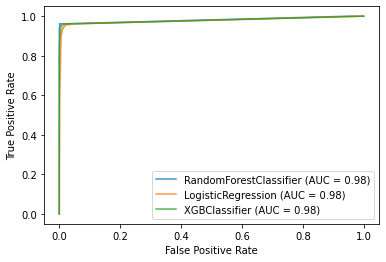

In [242]:
ax = plt.gca()
rf_roc = plot_roc_curve(rf, X_test, y_test,ax=ax, alpha=0.8)
lr_roc = plot_roc_curve(logmodel, X_test, y_test,ax=ax, alpha=0.8)
xg_roc = plot_roc_curve(model, X_test, y_test,ax=ax, alpha=0.8)
plt.show()

# We see the decision tree-based models are more accurate

# Final Fitting

In [244]:
test=pd.read_csv('test1Final.csv')

In [245]:
X=test.drop(["label","purchaseTime",'id'], axis=1)
y=test['label']

In [246]:
for i in Numerical_Var:
    x= X[[i]].values
    scaler = preprocessing.StandardScaler()
    x_scaled = scaler.fit_transform(x)
    X[i]=x_scaled

In [247]:
X.head()

,visitTime,hour,C1,C2,C3,C4,C5,C6,C7,C8,...,N4,N5,N6,N7,N8,N9,N10,C10,C11,C12
0,19360733,0,2569487005,403381353,681762206,652481754,2967512603,580883881,2303407174,157533148,...,-0.102243,-0.01346,-0.047226,-0.032181,-0.127852,-0.033793,-0.041962,2128770044,3617851689,4220791646
1,19360734,0,2416811818,1235983246,3653557526,652481754,2116767313,571765677,2303407174,2374954832,...,-0.102243,-0.01346,-0.047226,-0.032181,-0.127852,-0.033793,-0.041962,4256459078,2379633508,1284343215
2,19360735,0,3765056181,1235983246,1310333812,652481754,2116767313,571765677,2303407174,2374954832,...,-0.102243,-0.01346,-0.047226,-0.032181,-0.127852,-0.033793,-0.041962,2840358457,3831440054,1213938795
3,19360737,0,955802445,403381353,2290282995,652481754,2967512603,1607619193,1342367140,3588031319,...,-0.102243,-0.01346,-0.047226,-0.032181,-0.127852,-0.033793,-0.041962,4039873369,535829057,3828748840
4,19360752,0,2569487005,2517724481,2463986301,2308170622,2967512603,580883881,2303407174,157533148,...,-0.102243,-0.01346,-0.047226,-0.032181,-0.127852,-0.033793,-0.041962,907610626,3617851689,4220791646


In [290]:
Y_pred = rf.predict_proba(X)
Ypred = pd.DataFrame(Y_pred)
test1 = test.id

In [296]:
Final_Pred = pd.concat([test1.reset_index(drop=True), Ypred.iloc[:,1].reset_index(drop=True)], axis=1)

In [298]:
Final_Pred.to_csv('/Users/JohanLg/Documents/My Documents/ESCP/Kurser/Vår/Python/Assignment_23_e197443.csv')